In [1]:
import matplotlib.pyplot as plt

In [2]:
with open('test/result_rect.txt') as f:
    results = list(map(lambda x: list(map(int, x[:-1].split(','))), f.readlines()))

In [3]:
with open('test/groundtruth_rect.txt') as f:
    truths = list(map(lambda x: list(map(int, x[:-1].split(','))), f.readlines()))

In [4]:
test_size = 128
ratio_rate = 100

In [5]:
size = lambda obj: obj[2] * obj[3]

In [6]:
clash = lambda tar, obj: min(obj[2] + obj[0] - tar[0], tar[2])*min(obj[3] + obj[1] - tar[1], tar[3])/size(obj)

In [7]:
overlap = lambda tar, obj, rat: clash(tar, obj) >= rat

In [8]:
AUC = [sum([overlap(result, truth, ratio / 100) for result, truth, _ in zip(results, truths, range(test_size))]) / test_size for ratio in range(100)]        

In [9]:
sum(AUC) / 100

0.931015625

In [10]:
plt.plot(range(100), AUC);

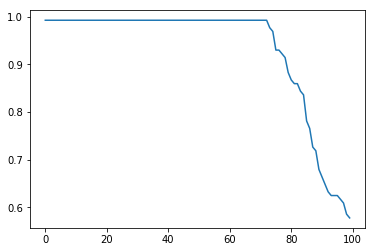

In [11]:
plt.show()